## Analyzing the Growth of Indian Start Ups

### Importing important libraries

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

### Setting Up the style

In [245]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7)

### Reading and analyzing the dataset 

In [246]:
data = pd.read_csv('Startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [247]:
data.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


### Data Cleaning 

Here in the following section I have done some simple data cleaning, by removing the '\\\\xc2\\\\xa0' characters which are hidden meta characters from the different columns

In [248]:
data.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName',
               'InvestmentType', 'AmountInUSD', 'Remarks']

In [249]:
def clean_string(x):
    return str(x).replace('\\xc2\\xa0',"").replace('\\\\xc2\\\\xa0',"")

for col in ['StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName',
               'InvestmentType', 'AmountInUSD', 'Remarks']:
    data[col] = data[col].apply(lambda x: clean_string(x))

In [250]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [251]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [252]:
#let us find out the shape of the dataset
print('The shape of the dataset is: ',data.shape)

The shape of the dataset is:  (3044, 10)


### Missing Value Identification

In [253]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


Although our analysis shows that there are no missing values present in the data set but it can be seen that there are lot of 'nan' values in the data set in different columns, for instance let us check the **Remarks** column to see that

In [255]:
data['Remarks'].value_counts()

nan                                     2625
Series A                                 177
Series B                                  64
Pre-Series A                              37
Series C                                  28
                                        ... 
Bridge round                               1
Part of $12M Series B funding              1
For mobile app                             1
Funding happened in Sept 2015              1
Part of Series A raised in June 2015       1
Name: Remarks, Length: 70, dtype: int64

It can be seen that almost 90% of the data in the **Remarks** column is 'nan' but it is not coming out to be missing values. A probable cause for this can be that the data in these columns has been input as string and not as numpy object. In the following sections if we counter these values we will manually clean them. As for the Remarks column as it contains almost 90% missing values, I am going to drop it

In [256]:
data = data.drop(['Remarks'], axis = 1)
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [257]:
data.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
City                object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
dtype: object

By checking the data type we saw that the **AmountInUSD** column is in **object** type and hence in the following columns I am going to clean it and convert in into a numerical data type 

In [258]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1', '2', '3','4','5','6','7','8','9']])
    x = str(x).replace(',','').replace('+','')
    x = str(x).lower().replace('undisclosed','')
    x = str(x).lower().replace('n/a','')
    if x == '':
        x = '-999'
    return x

data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

In addition to changing the data type to float I also cleaned the undesirable values and gave them a suitable form and also there are startups whohich has no fundings at all and in order to identify them easily I gave them a value of '-999' instead of keeping them as blank

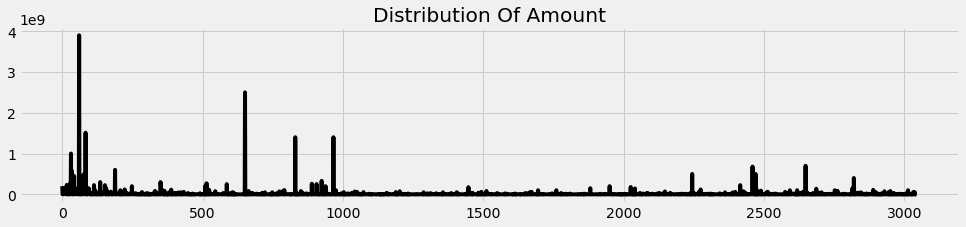

In [259]:
#Lets visualize the distribution of amounts
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution Of Amount')
plt.show()

In [260]:
#Lets clean the dates which are not consistent with the correct format
data['Date'][data['Date'] == '12/05.2015'] = '12/05/2015'
data['Date'][data['Date'] == '13/04.2015'] = '13/04/2015'
data['Date'][data['Date'] == '15/01.2015'] = '15/01/2015'
data['Date'][data['Date'] == '22/01//2015'] = '22/01/2015'
data['Date'][data['Date'] == '05/072018'] = '05/07/2018'
data['Date'][data['Date'] == '01/07/015'] = '01/07/2015'

data['Date'][data['Date'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In the following section I will try to find out which month of which year saw how many fundings. For that I have to change the data type of the date column into daatetime and also use the functions **.year and .month** to bring them to the desired format

In [261]:
data['yearmonth'] = (pd.to_datetime(data['Date'],format = '%d/%m/%Y').dt.year*100) + (pd.to_datetime(data['Date'],format = '%d/%m/%Y').dt.month)
                    
temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print('Number of funding per month in decreasing order (Top 10)\n', temp)
year_month = data['yearmonth'].value_counts()

Number of funding per month in decreasing order (Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


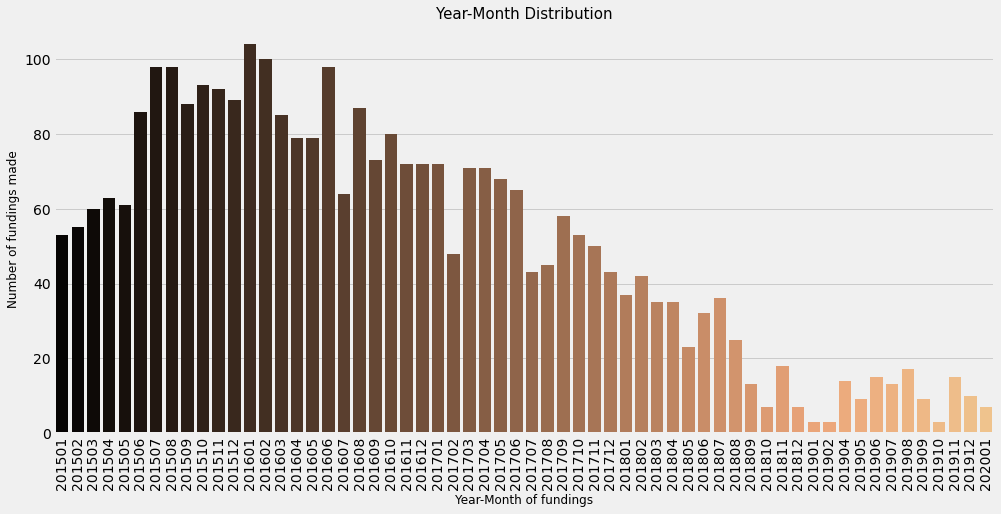

In [262]:
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(year_month.index,year_month.values,palette = 'copper')
plt.xlabel('Year-Month of fundings', fontsize = 12)
plt.ylabel('Number of fundings made', fontsize = 12)
plt.title('Year-Month Distribution', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [263]:
# Lets check what is the maximum amount that has been received by a startup
print('The maximum amount the startups got in India is:', data['AmountInUSD'].dropna().sort_values().max())

The maximum amount the startups got in India is: 3900000000.0


In [283]:
data['AmountInUSD'].describe()

count    3.044000e+03
mean     1.327006e+07
std      1.044042e+08
min     -9.990000e+02
25%     -9.990000e+02
50%      5.000000e+05
75%      4.000000e+06
max      3.900000e+09
Name: AmountInUSD, dtype: float64

In [264]:
#Lets check how many startups for a funding of more than 500000000(median value of amount)
@interact
def check(column = 'AmountInUSD', x = 500000000):
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [265]:
#No of times PAYTM was funded and the full information related to those fundings
data[data['StartupName'] == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [266]:
## Minimum amount received by a startup
print('The minimum amount the startups got in India is:', data['AmountInUSD'].dropna().sort_values().min())

The minimum amount the startups got in India is: -999.0


In [267]:
data[['StartupName', 'AmountInUSD']].sort_values(by = 'AmountInUSD', ascending = True).head()

,StartupName,AmountInUSD
2125,Splitkart,-999.0
1464,TAC Security,-999.0
708,FableStreet,-999.0
709,Monsoon Fintech,-999.0
710,MonkeyBox,-999.0


In [268]:
#No of startups receiving no fundings
data[data['AmountInUSD']==-999].shape

(971, 10)

In [269]:
#average funding received by a startup in India
print('On average Indian Startups got funding of: ', data['AmountInUSD'].dropna().sort_values().mean())

On average Indian Startups got funding of:  13270058.261169514


In [270]:
#Number of startups in the dataset
print('Number of startups', len(data['StartupName'].unique()))

Number of startups 2457


In [271]:
# Startups and number of fundings they received
print(data['StartupName'].value_counts().head(10))

Swiggy           8
Ola Cabs         8
Paytm            7
Medinfi          6
Nykaa            6
NoBroker         6
Meesho           6
UrbanClap        6
Uniphore         5
Capital Float    5
Name: StartupName, dtype: int64


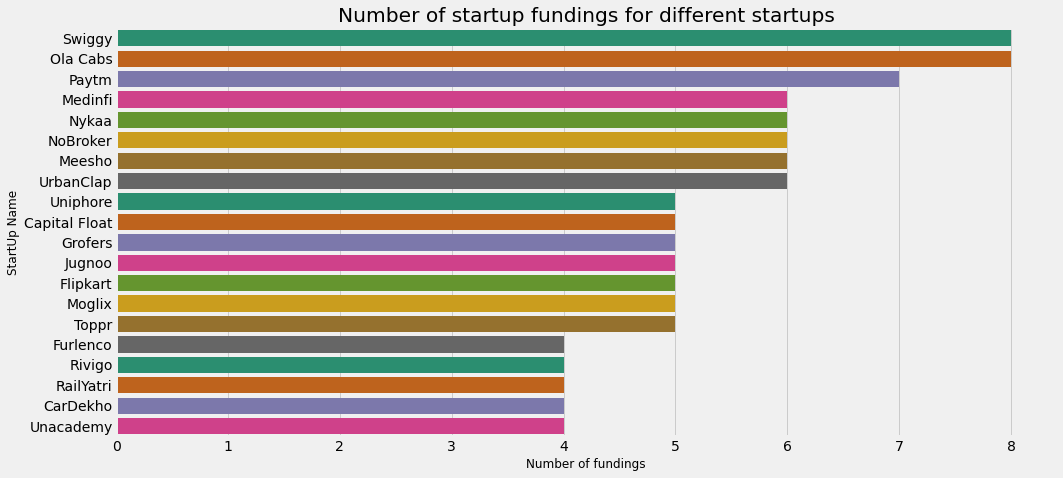

In [272]:
startupname = data['StartupName'].value_counts().head(20)
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(y = startupname.index,x = startupname.values,palette = 'Dark2')
plt.xlabel('Number of fundings',fontsize = 12)
plt.ylabel('StartUp Name', fontsize = 12)
plt.title('Number of startup fundings for different startups')
plt.show()

As it can be seen in the upcoming section that I am trying to find which industry domain is popular for a stratup and this can be done by analyzing the **IndustryVertical** column, but this column also has some 'nan' values in the form of strings. So I am going to replace the nan values with **Consumer Technology** and then carry out my analysis along with the visualization

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


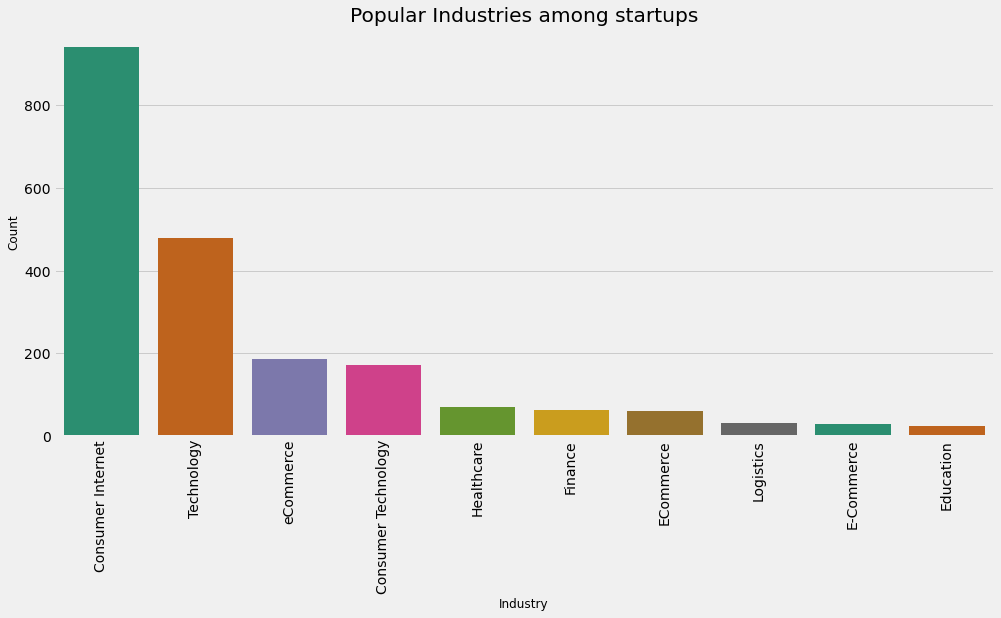

In [273]:
# Most popular Industry Vertical for a startup in India
data['IndustryVertical'] = data['IndustryVertical'].replace('nan','Consumer Technology')
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(industry.index,industry.values,palette = 'Dark2')
plt.xlabel('Industry',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Popular Industries among startups')
plt.xticks(rotation = 90)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online lending platform                           5
Online Lending                                    5
Online Education Platform                         5
Online Learning Platform                          5
Education                                         5
Non-Banking Financial Company                     4
Online Food Delivery                              4
Data Analytics platform                           3
Online learning platform                          3
Online Insurance Aggregator                       3
Online Furniture Store                            3
Online platform for Higher Education Services     3
E-learning                                        3
Online Insurance Platform                         3
B2B Marketplace                                   3
Logistics                                         3
Online Food 

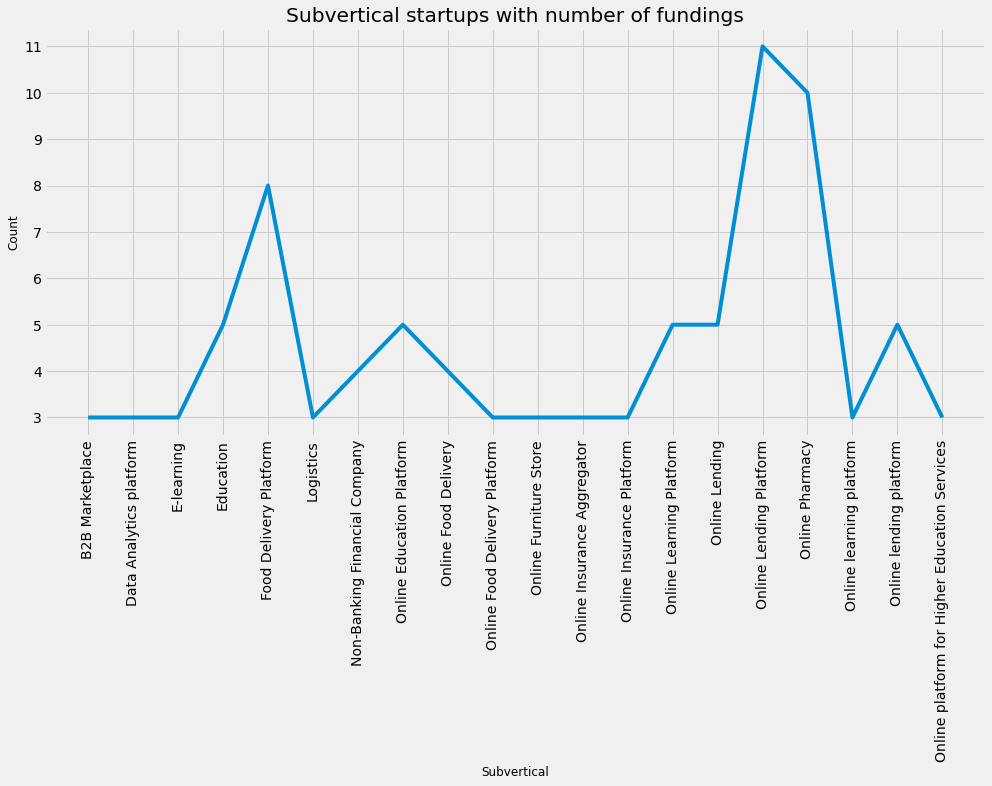

In [274]:
#Lets check which industry vertical is popular amonng the indian startups
industry_sub = data['SubVertical'].value_counts()[1:].head(20)
print(industry_sub)

plt.rcParams['figure.figsize'] = (15,7)
sns.lineplot(industry_sub.index,industry_sub.values,palette = 'Winter')
plt.xlabel('Subvertical',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Subvertical startups with number of fundings')
plt.xticks(rotation = 90)
plt.show()

Next let us check if the location plays any role in the setting up of the companies. 

In [275]:
data['City'].value_counts().head(10)

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
nan          180
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Name: City, dtype: int64

Now from the above section it can be seen that the mode for city in the dataset is Bangalore and also the name of Bangalore appears different times with different spellings. So this calls for a little bit of data cleaning. I will convert the nan values in the city column to Bangalore and also am going to change the different spellings of Bangalore and give them a common name **Bangalore**

Bangalore    1022
Mumbai        568
New Delhi     458
Gurgaon       341
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Ahmedabad      38
Jaipur         30
Name: City, dtype: int64


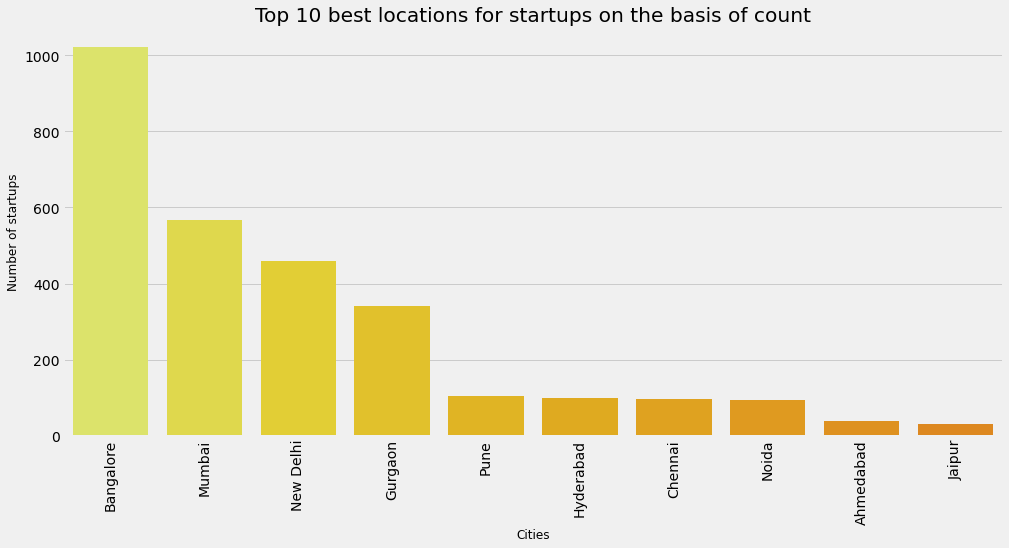

In [285]:
data['City'][data['City'] == 'Gurugram'] = 'Gurgaon'
data['City'][data['City'] == 'Delhi'] = 'New Delhi'
data['City'] = data['City'].replace(('Bengaluru','nan'),('Bangalore','Bangalore'))
city = data['City'].value_counts().head(10)
print(city)

plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(city.index,city.values,palette = 'Wistia')
plt.xlabel('Cities',fontsize = 12)
plt.ylabel('Number of startups', fontsize = 12)
plt.title('Top 10 best locations for startups on the basis of count')
plt.xticks(rotation = 90)
plt.show()

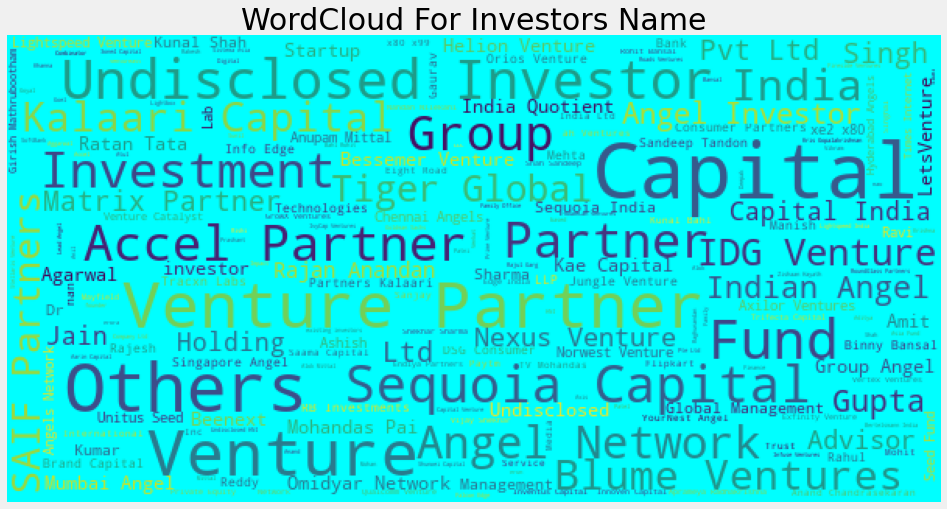

In [277]:
#Lets create a wordcloud and try to get an idea as to who are the dominant investors in the Indian StartUp market
from wordcloud import WordCloud

names = data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud = WordCloud(max_font_size =  50, width = 600, height = 300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('WordCloud For Investors Name', fontsize = 30)
plt.axis('off')
plt.show()

In [278]:
#Data Cleaning for investors name
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

#Top investors and the number of fundings made by them
investors = data['InvestorsName'].value_counts().head(10)
print(investors)


Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


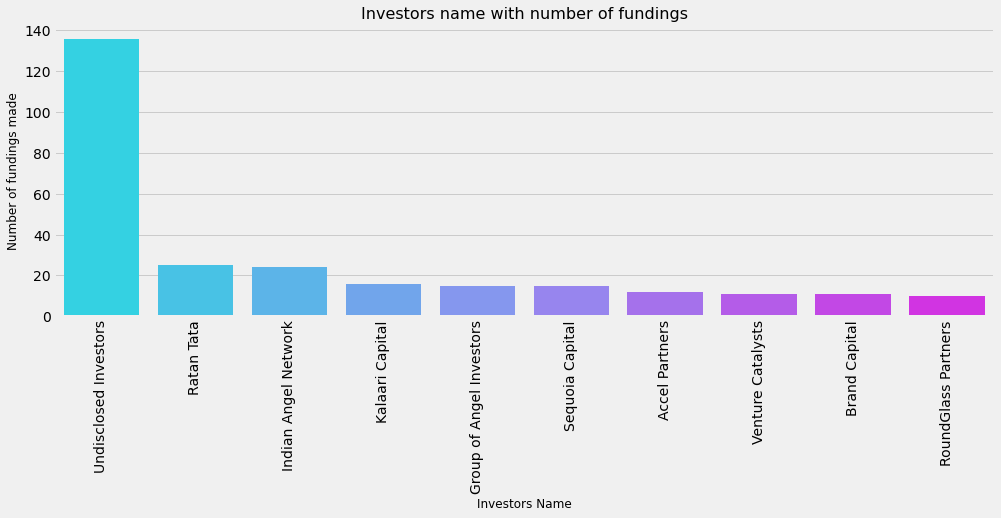

In [279]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investors Name', fontsize = 12)
plt.ylabel('Number of fundings made', fontsize = 12)
plt.title('Investors name with number of fundings', fontsize = 16)
plt.show()

In [280]:
#Different investment types 
data['InvestmentType'].value_counts().head(10)

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64

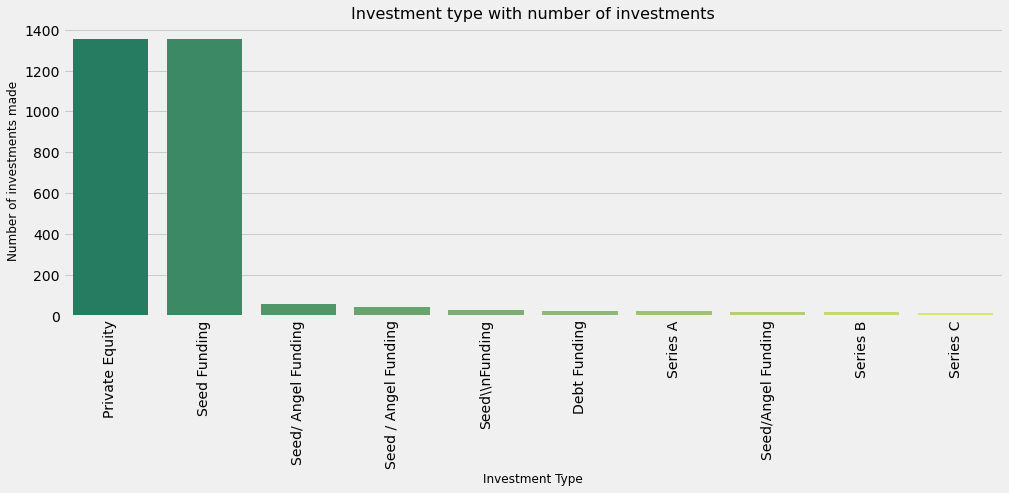

In [281]:
#Data cleaning in the Investors Name column
data['InvestorsName'][data['InvestorsName'] == 'SeedFunding'] == 'Seed Funding'
data['InvestorsName'][data['InvestorsName'] == 'Crowd funding'] == 'Crowd Funding'
data['InvestorsName'][data['InvestorsName'] == 'PrivateEquity'] == 'Private Equity'
data['InvestorsName'][data['InvestorsName'] == 'Seed/ Angel Funding'] == 'Seed Angel Funding'
data['InvestorsName'][data['InvestorsName'] == 'Seed/Angel Funding'] == 'Seed Angel Funding'
data['InvestorsName'][data['InvestorsName'] == 'Seed / Angel Funding'] == 'Seed Angel Funding'
data['InvestorsName'][data['InvestorsName'] == 'Angel / Seed Funding'] == 'Seed Angel Funding'

#Different types of investments made 
investment = data['InvestmentType'].value_counts().head(10)

plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation = 'vertical')
plt.xlabel('Investment Type', fontsize = 12)
plt.ylabel('Number of investments made', fontsize = 12)
plt.title('Investment type with number of investments', fontsize = 16)
plt.show()